# Описание признаков heart dataset
age - age in years

sex( 1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

tha - l3 = normal; 6 = fixed defect; 7 = reversable defect

target - 1 or 0 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/heart.csv', sep=",")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# отделим целевой признак от остальных

In [5]:
X = data.loc[:, data.columns != 'target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
Y = data['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# разобьем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1)

In [8]:
X_train.shape, y_train.shape

((227, 13), (227,))

In [9]:
X_test.shape, y_test.shape

((76, 13), (76,))

In [10]:
# 4 ближайших соседа
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
predicted

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
# если подумать о сущности датасета - определение возможной болезни сердца
# в случае, если мы сказали, что человек имеет болезнь и при этом ошиблись(FP) - это не страшно, 
# тк после настоящего обследования все встанет на свои места
# 
# в случае, если мы сказали, что человек имеет болезнь и не ошиблись (TP) - мы должны иметь хорошую точность, 
# чтобы люди шли на полное обследование
#
# в случае, если мы сказали, что человек не болен и при этом ошиблись (FN) - это очень плохо, тк человек подумает,
# что здоров и будет жить в незнании
#
# в случае, если мы сказали, что человек не болен и при этом не ошиблись (TN) - опять же, лучше иметь хорошую точность.
#
#
# ИТОГО: главный приоритет - избежать FN. Далее важен случай TP. 

In [12]:
# на основе этих размышлений выберем подходящие метрики

In [15]:
# на снове размышлений не смогла придти к заключении о метриках

# выбрала recall, f1, accuracy

In [16]:
# найдем показатели метрик для KNN при k=4

In [18]:
classification_report(y_test, predicted, output_dict=True)["0"], \
classification_report(y_test, predicted, output_dict=True)["1"]

({'precision': 0.5121951219512195,
  'recall': 0.6,
  'f1-score': 0.5526315789473684,
  'support': 35},
 {'precision': 0.6,
  'recall': 0.5121951219512195,
  'f1-score': 0.5526315789473684,
  'support': 41})

In [19]:
# при помощи решетчатого поиска и кросс-валидации найдем оптимальное значение гиперпараметра k
scoring = {
    'recall': make_scorer(recall_score), 
    'f1': make_scorer(f1_score), 
    'accuracy': make_scorer(accuracy_score)
}
n_range = np.array(range(1,60,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
         52, 55, 58])}]

In [21]:
knn_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=scoring, refit='f1')
knn_gs.fit(X_train, y_train)

C:\Users\Karina\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58])}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring={'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score), 'accuracy': make_scorer(accuracy_score)},
       verbose=0)

In [22]:
knn_gs.cv_results_

C:\Users\Karina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Karina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Karina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Karina\Anaconda3\lib\site-packages\sklea

{'mean_fit_time': array([0.00531883, 0.00422764, 0.00441103, 0.00288181, 0.00332522,
        0.00310211, 0.00429707, 0.00315542, 0.00458651, 0.00541945,
        0.00420866, 0.00408907, 0.00418696, 0.00197263, 0.00410857,
        0.00449066, 0.00331821, 0.00261712, 0.0020771 , 0.00367589]),
 'std_fit_time': array([0.0025916 , 0.0013245 , 0.0013657 , 0.00151242, 0.00162128,
        0.00121626, 0.0014145 , 0.00183021, 0.00216281, 0.00158877,
        0.00177168, 0.00086665, 0.00171185, 0.00239794, 0.00016527,
        0.00353699, 0.00114463, 0.00182948, 0.00183248, 0.00084218]),
 'mean_score_time': array([0.01400313, 0.01782246, 0.01448216, 0.0163475 , 0.01610379,
        0.01626787, 0.01537127, 0.01612062, 0.01531267, 0.01875162,
        0.02519975, 0.0173418 , 0.01747818, 0.0183094 , 0.0175087 ,
        0.01913385, 0.01641326, 0.01848106, 0.02130995, 0.0160872 ]),
 'std_score_time': array([0.00459088, 0.00189035, 0.00129575, 0.00056868, 0.00144306,
        0.00157083, 0.00149071, 0.001171

In [23]:
# лучшая модель
best_knn = knn_gs.best_estimator_
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [24]:
# лучшее значение f1
knn_gs.best_score_

0.7052798625001468

In [25]:
# лучшее значение k
knn_gs.best_params_

{'n_neighbors': 31}

In [26]:
# на начальном разбиении проверим метрики при новом значении k
# 4 ближайших соседа
best_knn.fit(X_train, y_train)
predicted_best = knn.predict(X_test)
predicted_best

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [27]:
classification_report(y_test, predicted_best, output_dict=True)["0"], \
classification_report(y_test, predicted_best, output_dict=True)["1"]

({'precision': 0.5121951219512195,
  'recall': 0.6,
  'f1-score': 0.5526315789473684,
  'support': 35},
 {'precision': 0.6,
  'recall': 0.5121951219512195,
  'f1-score': 0.5526315789473684,
  'support': 41})

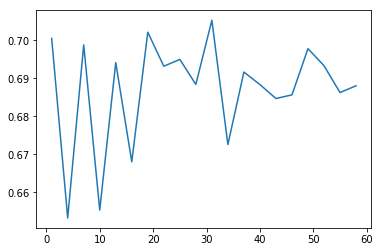

In [28]:
# изменение f1 от параметра k
plt.plot(n_range, knn_gs.cv_results_['mean_test_f1'])

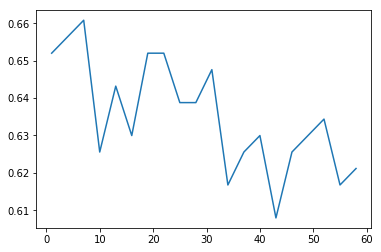

In [29]:
# изменение accuracy от параметра k
plt.plot(n_range, knn_gs.cv_results_['mean_test_accuracy'])

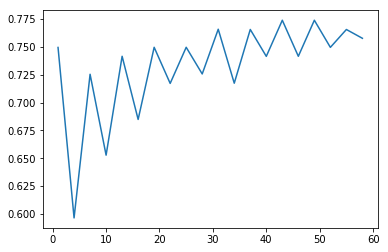

In [30]:
# изменение recall от параметра k
plt.plot(n_range, knn_gs.cv_results_['mean_test_recall'])

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [32]:
# кривые обучения и валидации

<module 'matplotlib.pyplot' from 'C:\\Users\\Karina\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

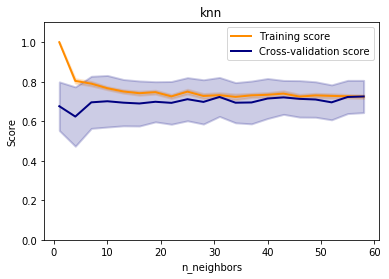

In [33]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\Users\\Karina\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

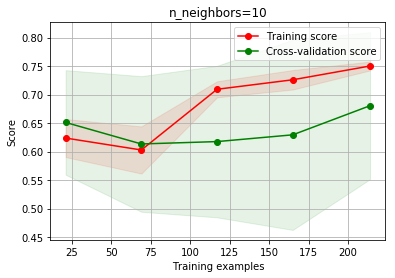

In [34]:
# выборка маловата для k=31
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    X_train, y_train, cv=20)